In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import sklearn
import seaborn as sns
import sklearn.cross_validation

In [62]:
url = '/Users/nschanch/Downloads/Non_Eruption_Analysis.csv'
non_erupting = pd.read_csv(url)
non_erupting = non_erupting.drop('Unnamed: 0', axis=1)
non_erupting.replace('Na',np.nan, inplace=True)
non_erupting['Eruption'] = 0
non_erupting.head()
#non_erupting.keys()


,Track No.,fi_length_avg,length_slp,fi_area_avg,area_slp,fi_chiral_avg,chiral_slp,fi_tilt_avg,tilt_slp,Eruption
0,160,8.518053e+09,0.022679,800.676875,0.944464,0.285714,-0.059997,7.865796,-0.066928,0
1,223,2.046743e+10,2.352309,6380.310208,1.417337,0.125000,3.000346,56.275550,-1.520328,0
2,389,1.713093e+10,3.315263,4748.111717,6.477098,0.125000,0.208594,55.076175,-1.213399,0
3,407,1.470928e+10,-0.696752,2663.535619,-1.265116,0.250000,2.409787,63.305550,-0.654461,0
4,858,9.614846e+09,3.679758,1975.296109,8.706082,-0.375000,-1.924303,20.914437,0.022831,0


In [66]:
url = '/Users/nschanch/Downloads/Eruption_Analysis.csv'
erupting = pd.read_csv(url)
erupting = erupting.drop('Unnamed: 0', axis=1)
erupting.replace('Na',np.nan, inplace=True)
erupting = erupting.astype(float)
erupting['Eruption'] = 1
#erupting = erupting.dropna()
erupting.head()

,Track No.,fi_length_avg,length_slp,fi_area_avg,area_slp,fi_chiral_avg,chiral_slp,fi_tilt_avg,tilt_slp,Eruption
0,2,1.277195e+10,NaN,1339.339685,NaN,0.000000,NaN,6.078750,NaN,1
1,21,7.486180e+09,2.617021,763.821648,-0.563418,0.000000,0.000000,55.760900,6.176173,1
2,58,6.547418e+09,NaN,689.791900,NaN,0.000000,NaN,79.751400,NaN,1
3,93,9.248102e+09,0.734082,2829.982076,-0.306776,0.000000,4.706329,9.283704,4.488977,1
4,94,1.501422e+10,-1.541151,4035.269818,-0.164589,-0.142857,-3.257830,33.833814,0.721631,1


In [21]:
#KS test for filament length
erupt_len = erupting['fi_length_avg'].tolist()
nerupt_len = non_erupting['fi_length_avg'].tolist()
stats.ks_2samp(erupt_len, nerupt_len)

(0.51181525241675618, 5.3747810717729991e-07)

In [67]:
#KS test for change in length (slope)
erupt_slen = erupting['length_slp'].dropna().tolist()
nerupt_slen = non_erupting['length_slp'].dropna().tolist()
stats.ks_2samp(erupt_slen, nerupt_slen)

(0.23404255319148937, 0.087638693424715933)

In [22]:
erupt_area = erupting['fi_area_avg'].tolist()
nerupt_area = non_erupting['fi_area_avg'].tolist()
stats.ks_2samp(erupt_area, nerupt_area)

(0.49570354457572502, 1.3725645137428997e-06)

In [61]:
#KS test for change in area (slope)
erupt_sarea = erupting['area_slp'].dropna().astype(float).tolist()
nerupt_sarea = non_erupting['area_slp'].dropna().astype(float).tolist()
stats.ks_2samp(erupt_sarea, nerupt_sarea)

(0.56774916013437848, 2.0317696234496882e-08)

In [77]:
##Now lets see if we can predict whether a filament will erupt or not. 

erupting = erupting.astype(float)
all_eruptions=erupting.append(non_erupting,ignore_index = True)
all_eruptions = all_eruptions.dropna() #for now, dropping everything with NaN
all_eruptions.head()

,Track No.,fi_length_avg,length_slp,fi_area_avg,area_slp,fi_chiral_avg,chiral_slp,fi_tilt_avg,tilt_slp,Eruption
1,21,7.486180e+09,2.617021,763.821648,-0.563418,0.000000,0.000000,55.760900,6.176173,1
3,93,9.248102e+09,0.734082,2829.982076,-0.306776,0.000000,4.706329,9.283704,4.488977,1
4,94,1.501422e+10,-1.541151,4035.269818,-0.164589,-0.142857,-3.257830,33.833814,0.721631,1
5,140,1.445096e+10,3.421768,3925.812754,0.375905,0.250000,0.242555,17.280300,4.510884,1
6,175,1.432468e+10,2.540362,4182.838115,1.118702,0.400000,-1.354914,22.194140,0.169296,1


In [78]:
#Pull out the feature we want to predict (1 for eruption, 0 for no eruption)
Y = np.array(all_eruptions['Eruption'])

In [79]:
#Now we need to remove that from our dataset. 
all_eruptions = all_eruptions.drop('Eruption',1)

In [80]:
#Now we need to save all of the features as a matrix for the calucations later
X = all_eruptions.as_matrix()
print X

[[  2.10000000e+01   7.48618045e+09   2.61702071e+00 ...,   0.00000000e+00
    5.57609000e+01   6.17617259e+00]
 [  9.30000000e+01   9.24810247e+09   7.34081767e-01 ...,   4.70632930e+00
    9.28370400e+00   4.48897738e+00]
 [  9.40000000e+01   1.50142222e+10  -1.54115087e+00 ...,  -3.25783011e+00
    3.38338143e+01   7.21630702e-01]
 ..., 
 [  3.16600000e+03   8.63901656e+09  -3.08057485e+00 ...,   2.38654530e+00
    8.81764000e+00  -4.06740144e+00]
 [  3.18500000e+03   8.68205690e+09  -1.06491643e+00 ...,  -1.58628804e+00
    3.78465000e+01  -1.28943701e+00]
 [  3.23200000e+03   3.80288486e+09  -9.25366399e-01 ...,   7.78335829e+00
    1.17732250e+01   8.41856134e-01]]


Our goal is to be able to predict the outcome (Y) by using the features (X)
Since we have a binary outcome, we want to use a classification scheme
Because of this, I am going to try to use a random forest classifier (I can send you details on what this is)
This is a good method when there is only a small sample (200 events is very small in data science)



In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

#Let's start by making 40 different 'trees'
n_trees = range(1,41)

scores = []
for i in n_trees:
    forest = sklearn.ensemble.RandomForestClassifier(n_estimators = i)
    val_score = cross_val_score(forest, X=X, y=Y, cv=10)
    scores.append(val_score) 


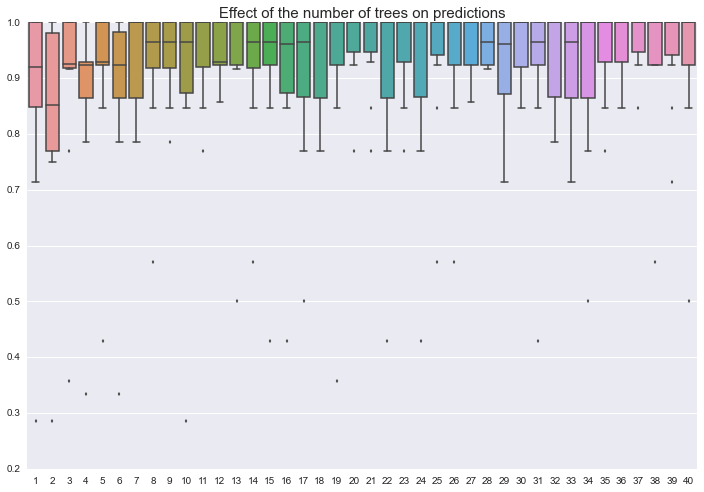

In [83]:
#How good at prediction is my tree? (I ran 40 different test, so each bar is one test).
from matplotlib import pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Effect of the number of trees on predictions', fontsize=15)
sns.boxplot(scores)
#Note: This is before correcting for the unbalanced sample size. 

In [85]:
## your code here
non_erupt = 0.
for eruption in Y:
    if eruption == 0:
        non_erupt = non_erupt+1.
avg = non_erupt/len(Y)
print avg
print '%d percent of filaments do NOT erupt. Our sample is not balanced' % (avg*100)

0.287878787879
28 percent of filaments do NOT erupt. Our sample is not balanced


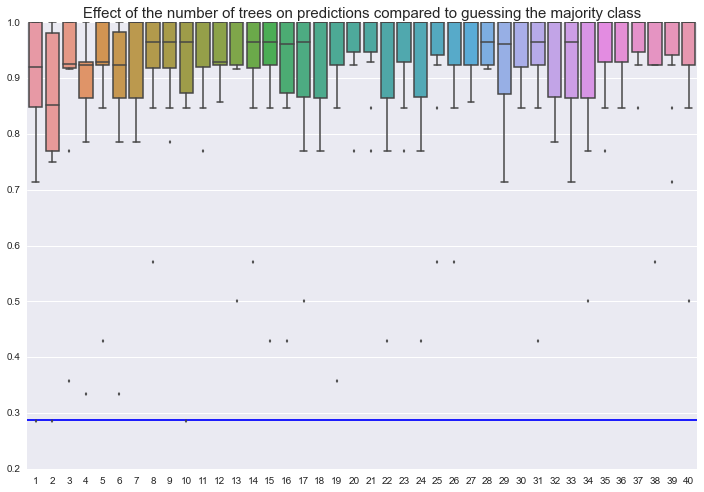

In [86]:
plt.figure(figsize=(12,8))
plt.axhline(y=avg)
plt.title('Effect of the number of trees on predictions compared to guessing the majority class', fontsize=15)
sns.boxplot(scores)

In [87]:
scores_2 = []
for i in n_trees:
    forest_2 = sklearn.ensemble.RandomForestClassifier(n_estimators = i)
    val_score_2 = cross_val_score(forest, X=X, y=Y, cv=10, scoring='f1')
    scores_2.append(val_score_2) 

/usr/local/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


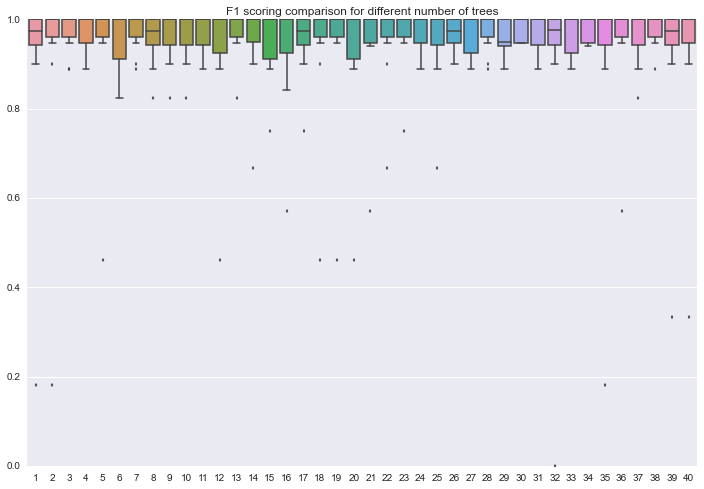

In [88]:
plt.figure(figsize=(12,8))
plt.title('F1 scoring comparison for different number of trees')
sns.boxplot(scores_2)

In [110]:
#make the forest classifier and do that fit. Then find the probabilities
forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 15)
fitted_forest = forest.fit(X, Y)
proba = fitted_forest.predict_proba(X)

#Make a prediction based on probabilities
class_predict = fitted_forest.predict(X)
print class_predict[:10]


#Now just make a prediction based on raw values of the probabilities
erupt_good = proba[:, 1]
sanity_predict = [0]*len(erupt_good)
print erupt_good[:10]
for i in range(len(sanity_predict)):
    if erupt_good[i] > 0.5:
        sanity_predict[i] = 1
    else:
        sanity_predict[i] = 0
        
        
print sanity_predict[:10]
#val_score = cross_val_score(forest, X=X, y=Y, cv=10)
#scores.append(val_score) 

(class_predict == sanity_predict).all()

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.73333333  0.73333333  0.93333333  0.93333333  1.          1.
  0.86666667  1.          1.          1.        ]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


True

In [108]:
#Which features are leading to the good predictions?
feature_forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 15)
#by_feature = feature_forest.feature_importances_
fitted_forest4a = forest.fit(X, Y)
val_score_ = cross_val_score(fitted_forest4a, X=X, y=Y, cv=10)
imp_features = fitted_forest4a.feature_importances_

print imp_features

[ 0.03377324  0.12701392  0.00969393  0.20740465  0.24363825  0.01251684
  0.00657445  0.04014756  0.31923715]


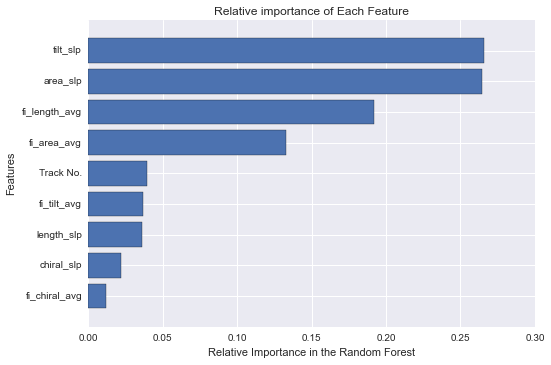

In [111]:
#Whitch features are most useful for prediction?
clf = RandomForestClassifier(n_estimators=15)

clf.fit(X,Y)
importance_list = clf.feature_importances_
name_list = all_eruptions.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

['Track No.', 'fi_length_avg', 'length_slp', 'fi_area_avg', 'area_slp', 'fi_chiral_avg', 'chiral_slp', 'fi_tilt_avg', 'tilt_slp']


([<matplotlib.axis.XTick at 0x10cdce610>,
 <a list of 9 Text xticklabel objects>)

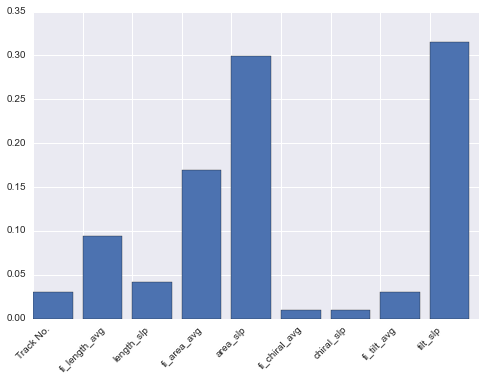

In [91]:
#Which features are most useful for the prediction? (Same as above, just different plot).
feature_names = (all_eruptions.columns).astype(str)
feature_str = [str(x) for x in feature_names]
print feature_str
#sns.barplot(feature_str, imp_features)
plt.bar(range(len(feature_str)), imp_features)
plt.xticks(range(len(feature_str)), feature_str, rotation=45)
#plt.xlabel(feature_str)

In [92]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y,cmap=plt.cm.Paired)
    plt.show()
    
## your code here

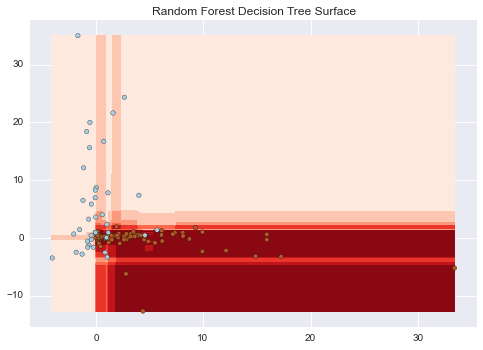

In [106]:
#Look at the predictions.
eruptions_subset = all_eruptions[['tilt_slp','area_slp']].as_matrix()


subset_forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 15)
fitted_subset = subset_forest.fit(eruptions_subset, Y)
#subset_val_score = cross_val_score(subset_forest, X=wine_subset, y=Y, cv=10)
plt.title('Random Forest Decision Tree Surface')
plot_decision_surface(fitted_subset, eruptions_subset, Y)

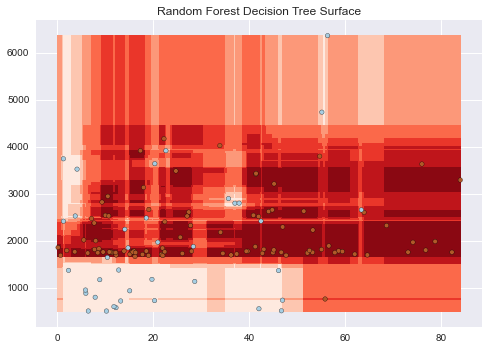

In [105]:
eruptions_subset = all_eruptions[['fi_tilt_avg','fi_area_avg']].as_matrix()


subset_forest = sklearn.ensemble.RandomForestClassifier(n_estimators = 15)
fitted_subset = subset_forest.fit(eruptions_subset, Y)
#subset_val_score = cross_val_score(subset_forest, X=wine_subset, y=Y, cv=10)
plt.title('Random Forest Decision Tree Surface')
plot_decision_surface(fitted_subset, eruptions_subset, Y)

In [96]:
erupting['area_slp'].describe()

count    94.000000
mean     -0.214416
std       1.739554
min     -12.682072
25%      -0.194964
50%       0.151951
75%       0.377944
max       1.929140
Name: area_slp, dtype: float64

In [97]:
non_erupting['area_slp'].describe()

count    38.000000
mean      5.661781
std       8.943160
min      -3.493795
25%      -0.240947
50%       1.866463
75%       8.145703
max      35.001897
Name: area_slp, dtype: float64

In [102]:
erupting['tilt_slp'].describe()

count    94.000000
mean      3.489865
std       4.907984
min       0.011798
25%       0.635690
50%       1.899528
75%       4.149110
max      33.418324
Name: tilt_slp, dtype: float64

In [103]:
non_erupting['tilt_slp'].describe()

count    38.000000
mean      0.117082
std       1.828441
min      -4.067401
25%      -0.783442
50%      -0.157603
75%       0.942336
max       5.699522
Name: tilt_slp, dtype: float64

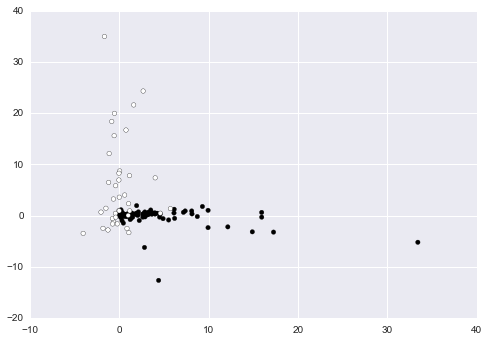

In [129]:
colors = Y
plt.scatter(all_eruptions['tilt_slp'],all_eruptions['area_slp'], c=colors)


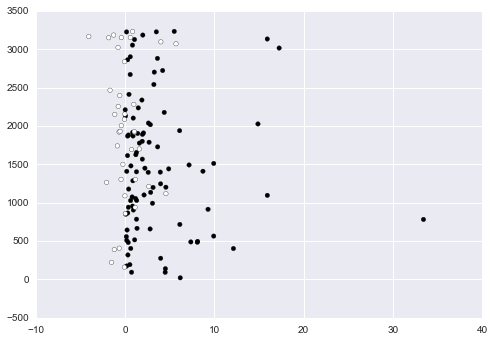

In [128]:
colors = Y
plt.scatter(all_eruptions['tilt_slp'], all_eruptions['Track No.'], c=colors)